# Fashion classification

In [1]:
# connecting to https://github.com/alexeygrigorev/clothing-dataset-small and access to the train folder
# and download the images to the local machine
import numpy as np
import matplotlib.pyplot as plt
import os
import requests 
import re
import urllib.request
import urllib.parse
import matplotlib.pyplot as plt


In [2]:
from PIL import Image # python image library

In [3]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

fatal: destination path 'clothing-dataset-small' already exists and is not an empty directory.


## 8.1 Tensorflow and Keras

In [4]:
import tensorflow as tf
from tensorflow import keras

2024-12-26 19:31:36.056974: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-26 19:31:36.075236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735241496.096074     662 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735241496.102257     662 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-26 19:31:36.123026: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [5]:
# load the images
from tensorflow.keras.preprocessing.image import load_img

In [6]:
path = './clothing-dataset-small/train/t-shirt'
name = '0aa095c3-9d4d-4416-8788-82655af859a8.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299, 299))

In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

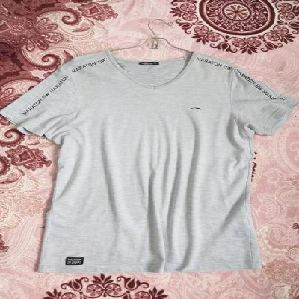

In [8]:
img

## 8.3 pre-trained convulotional neural networks

models created in keras.io

Xception is fast and accurate https://keras.io/api/applications/xception/

In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions # decode the predictions

In [10]:
model = Xception(weights='imagenet' , input_shape=(299, 299, 3))


I0000 00:00:1735241498.615374     662 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
X = np.array([x])

In [12]:
X = preprocess_input(X)

In [13]:
pred = model.predict(X)

I0000 00:00:1735241502.906076     716 service.cc:148] XLA service 0x7f9e48015ec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735241502.906117     716 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-26 19:31:42.952230: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1735241503.311032     716 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-26 19:31:44.863644: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


I0000 00:00:1735241505.744798     716 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [14]:
pred # the output is the probability of each class

array([[1.34075875e-04, 1.99491304e-04, 1.38995762e-04, 9.28812151e-05,
        2.25855983e-04, 1.41695025e-04, 2.38047389e-04, 7.21196775e-05,
        1.00887497e-04, 1.27038351e-04, 2.50686513e-04, 1.72984510e-04,
        8.38639826e-05, 1.23079080e-04, 1.18416494e-04, 1.55064670e-04,
        3.06398753e-04, 1.51312328e-04, 1.54622830e-04, 2.00328432e-04,
        5.71274490e-04, 1.48945299e-04, 2.93316436e-04, 1.78581511e-04,
        3.11867509e-04, 9.38093435e-05, 1.53346700e-04, 2.13553358e-04,
        2.44090697e-04, 1.43336583e-04, 1.95771252e-04, 1.56419817e-04,
        2.60700093e-04, 4.30338143e-04, 4.72015119e-04, 3.14603356e-04,
        1.78120215e-04, 1.46812134e-04, 3.52044939e-04, 2.77656334e-04,
        1.20578392e-04, 3.81063088e-04, 6.19300583e-04, 6.29694201e-04,
        5.79722342e-04, 2.20663045e-04, 2.19340640e-04, 2.19563735e-04,
        3.21378990e-04, 3.99606477e-04, 3.91035748e-04, 1.67438615e-04,
        8.50157347e-04, 1.13836210e-03, 6.88577478e-04, 4.617955

In [15]:
decode_predictions(pred) # the output is the class name and the probability

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', np.float32(0.6584978)),
  ('n03877472', 'pajama', np.float32(0.03560306)),
  ('n03710637', 'maillot', np.float32(0.028791722)),
  ('n04525038', 'velvet', np.float32(0.024760805)),
  ('n04370456', 'sweatshirt', np.float32(0.0138901295))]]

as this model is very general and does not have tshirt, is not fittig our purpose

but we can built on top, not neccesary starting from scratch

## 8.4 convolutional neural networks

## 8.5 Transfer learning

reuse conv layers and train our dense layer for our purpuse

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150), # train model faster by using smaller images
    batch_size=32 # number of images to process at once, 32 images at once. we will have 32 vectors of 150x150x3
)

Found 3068 images belonging to 10 classes.


In [18]:
train_ds.class_indices # the output is the class name and the index

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [19]:
X, y = next(train_ds) # x is the image and y is the label

In [20]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [21]:
y[5]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

here we see that is 1 in the second class, so it means is a hat. similar than in one hot encoding

the 1 in the last indice meand is a tshirt

In [22]:
X[5]

array([[[-0.01176471,  0.082353  , -0.02745098],
        [ 0.02745104,  0.07450986, -0.01960784],
        [-0.01960784,  0.00392163, -0.08235294],
        ...,
        [ 0.5372549 ,  0.6862745 ,  0.73333335],
        [ 0.56078434,  0.70980394,  0.75686276],
        [ 0.56078434,  0.70980394,  0.75686276]],

       [[-0.00392157,  0.082353  , -0.02745098],
        [-0.01960784,  0.00392163, -0.08235294],
        [-0.18431371, -0.16862744, -0.25490195],
        ...,
        [ 0.56078434,  0.70980394,  0.75686276],
        [ 0.56078434,  0.70980394,  0.75686276],
        [ 0.54509807,  0.69411767,  0.7411765 ]],

       [[-0.04313725,  0.0196079 , -0.08235294],
        [-0.26274508, -0.23921567, -0.32549018],
        [-0.3960784 , -0.3960784 , -0.47450978],
        ...,
        [ 0.5294118 ,  0.6784314 ,  0.7254902 ],
        [ 0.5372549 ,  0.6862745 ,  0.73333335],
        [ 0.49803925,  0.64705884,  0.69411767]],

       ...,

       [[ 0.20000005,  0.03529418, -0.20784312],
        [ 0

In [23]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


using xception to get the conv layer
we say include_top flase means that we dont need to include the dense layers

In [24]:
base_model = Xception(weights='imagenet', 
                      include_top=False, # we are not including the last layer
                      input_shape=(150, 150, 3)
                      ) # include_top=False means that we are not including the last layer

base_model.trainable = False # we are not training the model

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


create a new top layer

In [25]:
inputs = keras.Input(shape=(150, 150, 3)) # input layer

base = base_model(inputs, training=False) # the output of the base model. training=False means that we are not training the model

outputs = base 

model = keras.Model(inputs=inputs, outputs=outputs)

In [26]:
preds = model.predict(X)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [27]:
preds.shape

(32, 5, 5, 2048)

inputs = keras.Input(shape=(150, 150, 3)) # input layer

base = base_model(inputs)

outputs = base 

model = keras.Model(inputs=inputs, outputs=outputs)

In [28]:
inputs = keras.Input(shape=(150, 150, 3)) # input layer

base = base_model(inputs, training=False) # the output of the base model

# pooling = keras.layers.GlobalAveragePooling2D()
# vectors = pooling(base)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = vectors

model = keras.Model(inputs=inputs, outputs=outputs)

In [29]:
preds = model.predict(X)

preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(32, 2048)

In [30]:
inputs = keras.Input(shape=(150, 150, 3)) # input layer

base = base_model(inputs, training=False) # the output of the base model. training=False means that we are not training the model

# pooling = keras.layers.GlobalAveragePooling2D()
# vectors = pooling(base)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

#outputs = keras.layers.Dense(10, activation='softmax')(vectors)

model = keras.Model(inputs=inputs, outputs=outputs)

In [31]:
preds = model.predict(X)

preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(32, 10)

In [32]:
preds[0]

array([-0.6461625 , -0.696517  ,  0.34522834, -2.0100312 ,  1.2130425 ,
        1.3856356 , -0.29533038,  1.7714096 ,  1.9500649 , -1.4123284 ],
      dtype=float32)

we havent trained yet the model

we train the model by using the optimizer, there are multiple but we will use Adam.
optimizer is using gradient descent and what it does is changing the w1,w2.... 

Adam has multiple parameters but learning rate is the most important one. 


In [33]:
optimizer = keras.optimizers.Adam(learning_rate=0.01) # optimizer is used to minimize the loss function by updating the weights of the model

loss = keras.losses.CategoricalCrossentropy(from_logits=True) # meansquarederror when is regression
# from_logits=True means that the output is not normalized. If we have false, we need to use softmax activation function inside the model like outputs = keras.layers.Dense(10, activation='softmax')(vectors)


In [34]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [35]:

# history = model.fit(train_ds, 
#                     epochs=10, 
#                     validation_data=val_ds) # epochs is the number of times that the model will see the data, we have 32 batches, so we have 32*10 = 320 images. Go over the data 10 times



In [36]:
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0, 1])

# 8.6 Learnig rate
tells how fas you read. the fastest you learn the lowest quality learning. Less learning rate might cause underfit and learning rate high might cause overfit. Important to find good balance. 

In [37]:
def make_model(learning_rate=0.01):
    base_model.trainable = False
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy']
                )
    return model

In [38]:
# scores = {}
# for lr in [0.0001, 0.1, 0.01, 0.001]:
#     print(f'lr={lr}')
#     model = make_model(learning_rate=lr)
#     history = model.fit(train_ds, epochs=10, validation_data=val_ds)
#     scores[lr] = history.history
#     print()
#     print()

In [39]:
#for lr , hist in scores.items():
 #   plt.plot(hist['accuracy'], label=lr)
#plt.xticks(np.arange(10))
#plt.legend()

NameError: name 'scores' is not defined

In [ ]:
# for lr , hist in scores.items():
#     plt.plot(hist['val_accuracy'], label=lr)
# plt.xticks(np.arange(10))
# plt.legend()

## 8.7 Checkpointing
Saving the model when the accuracy is higher

In [40]:
model.save_weights('model_v1.weights.h5')

In [41]:
checkpoint = keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.2f}.h5.keras', 
                                save_best_only=True, 
                                monitor='val_accuracy', 
                                mode='max'
                                )

In [ ]:
# learning_rate = 0.001

# model = make_model(learning_rate=learning_rate)
# history = model.fit(train_ds, 
#                     epochs=10, 
#                     validation_data=val_ds,
#                     callbacks=[checkpoint]
#                     )

## 8.8 Adding more layers

In [42]:
def make_model(learning_rate=0.01,size_inner=100):
    base_model.trainable = False
    #########################################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    #########################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy']
                )
    return model

In [43]:
learning_rate = 0.001
scores = {}
for size in [10, 100, 1000]:
    print(f'size={size}')
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    print()
    print()

size=10
Epoch 1/10


/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 170ms/step - accuracy: 0.4089 - loss: 1.7559 - val_accuracy: 0.7097 - val_loss: 0.9485
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.7341 - loss: 0.8674 - val_accuracy: 0.7537 - val_loss: 0.7472
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.7891 - loss: 0.6420 - val_accuracy: 0.7947 - val_loss: 0.6548
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.8289 - loss: 0.5311 - val_accuracy: 0.7918 - val_loss: 0.6228
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.8846 - loss: 0.4042 - val_accuracy: 0.8006 - val_loss: 0.6150
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.8984 - loss: 0.3518 - val_accuracy: 0.8065 - val_loss: 0.6093
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9093 - loss: 0.3024 - val_accuracy: 0.8270 - val_loss: 0.5688
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9364 - loss: 0.2506 - val_accuracy: 0.8123 - val_loss: 

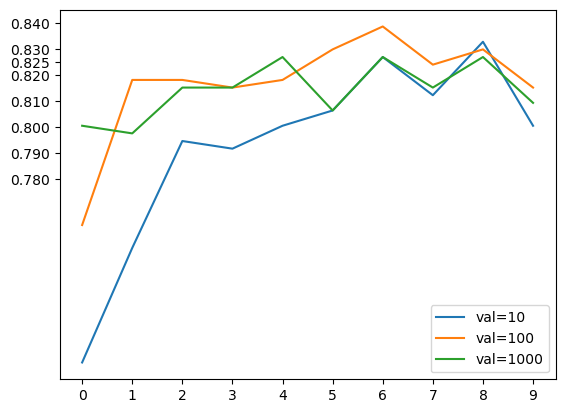

In [44]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))
plt.xticks(np.arange(10))
plt.yticks([0.78, 0.79, 0.80, 0.81, 0.82, 0.825, 0.83, 0.84])
plt.legend()

## 8.9 Regularization and dropout


frozen parts of the inner layer

In [45]:
def make_model(learning_rate=0.01,size_inner=100,droprate=0.2):
    base_model.trainable = False
    #########################################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop=keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    #########################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy']
                )
    return model

In [46]:
learning_rate = 0.001
size_inner = 100

scores = {}

for droprate in [0.0,0.2,0.5]:
    print(f'size={size}')
    model = make_model(learning_rate=learning_rate, 
                       size_inner=size,
                       droprate=droprate)
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history
    print()
    print()

size=1000
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - accuracy: 0.6171 - loss: 1.2240 - val_accuracy: 0.7566 - val_loss: 0.6818
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.8489 - loss: 0.4297 - val_accuracy: 0.8006 - val_loss: 0.5820
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9124 - loss: 0.2756 - val_accuracy: 0.8035 - val_loss: 0.6070
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9639 - loss: 0.1367 - val_accuracy: 0.8182 - val_loss: 0.5982
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9822 - loss: 0.0805 - val_accuracy: 0.8006 - val_loss: 0.6962
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9907 - loss: 0.0588 - val_accuracy: 0.8270 - val_loss: 0.6647
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9982 - loss: 0.0258 - val_accuracy: 0.8065 - val_loss: 0.6985
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9970 - loss: 0.0211 - val_accuracy

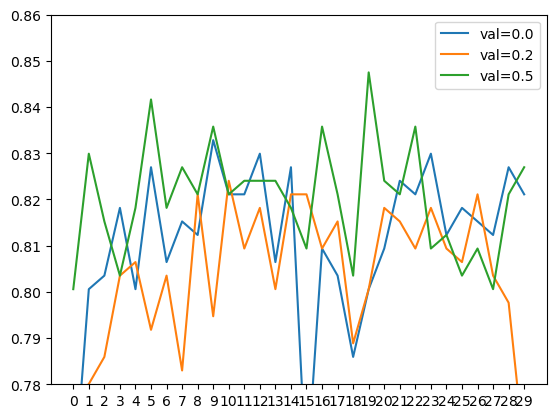

In [47]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.xticks(np.arange(30))
plt.ylim([0.78, 0.86])
plt.legend()

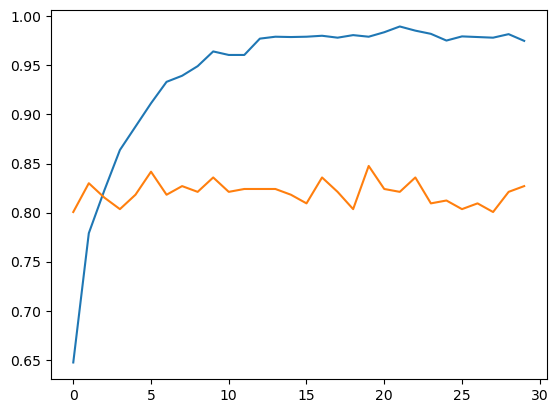

In [48]:
hist = scores[0.5]
plt.plot(hist['accuracy'], label='accuracy')
plt.plot(hist['val_accuracy'], label = 'val_accuracy')

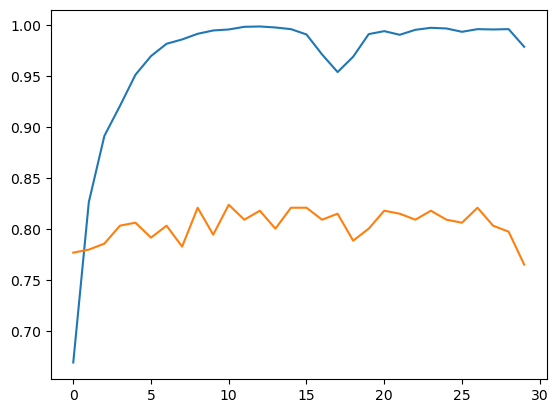

In [49]:
hist = scores[0.2]
plt.plot(hist['accuracy'], label='accuracy')
plt.plot(hist['val_accuracy'], label = 'val_accuracy')

## 8.10 Data Augmentation

generate more images from existing.
Possible image transformations:
- flip
- rotation
- shift
- shear
- zoom in/out
- brightness/contrast
- black patch



how to choose augmentations:
- own judgements. for example horizontal flip does not make sense as always are ok in pur photos.
- look at the dataset ans see what type of augmentations they have
- tune it as a hyperparameter: is better with that or not

In [50]:
 train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                               #rotation_range=30, # did not work better
                               #width_shift_range=10.0,# did not work better
                               #height_shift_range=10.0,# did not work better
                               #shear_range=1.0,
                               #zoom_range=0.1,
                               #horizontal_flip=False,
                               vertical_flip=True
                                 )
train_ds = train_gen.flow_from_directory(
     './clothing-dataset-small/train',
     target_size=(150, 150),
     batch_size=32
 )

 val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

 val_ds = val_gen.flow_from_directory(
     './clothing-dataset-small/validation',
     target_size=(150, 150),
     batch_size=32,
     shuffle=False
 )

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [51]:
learning_rate = 0.001
size_inner = 100
droprate = 0.2

model = make_model(learning_rate=learning_rate,
                     size_inner=size_inner,
                     droprate=droprate)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.5177 - loss: 1.4784 - val_accuracy: 0.7537 - val_loss: 0.7591
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.7256 - loss: 0.8251 - val_accuracy: 0.7507 - val_loss: 0.7284
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.7707 - loss: 0.6859 - val_accuracy: 0.7801 - val_loss: 0.6276
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.8047 - loss: 0.5683 - val_accuracy: 0.7801 - val_loss: 0.6700
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8089 - loss: 0.5398 - val_accuracy: 0.7771 - val_loss: 0.6521
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.8630 - loss: 0.4039 - val_accuracy: 0.7771 - val_loss: 0.6220
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.8628 - loss: 0.4264 - val_accuracy: 0.8240 - val_loss: 0.5794
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.8735 - loss: 0.3843 - val_accuracy: 0.8035 -

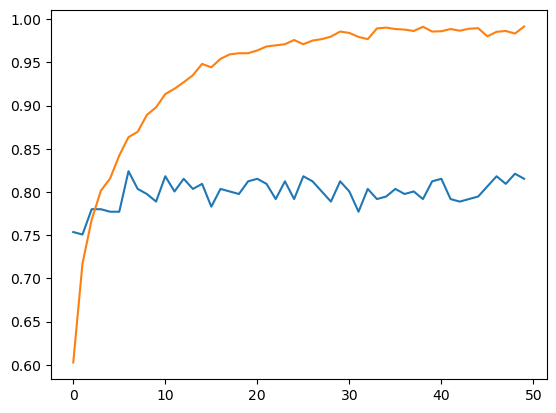

In [54]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

## 8.11 training a larger model

In [55]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [56]:
input_size = 299

In [57]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [59]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [60]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50


2024-12-26 20:03:04.139982: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.43GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


 7/96 ━━━━━━━━━━━━━━━━━━━━ 42s 483ms/step - accuracy: 0.3277 - loss: 2.0776

2024-12-26 20:03:18.121018: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.34GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 639ms/step - accuracy: 0.5805 - loss: 1.3491

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-12-26 20:04:22.899003: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.18GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


96/96 ━━━━━━━━━━━━━━━━━━━━ 94s 822ms/step - accuracy: 0.5817 - loss: 1.3451 - val_accuracy: 0.8270 - val_loss: 0.5442
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 606ms/step - accuracy: 0.8278 - loss: 0.5269 - val_accuracy: 0.8504 - val_loss: 0.4317
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 608ms/step - accuracy: 0.8685 - loss: 0.4184 - val_accuracy: 0.8680 - val_loss: 0.4182
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 608ms/step - accuracy: 0.8779 - loss: 0.3695 - val_accuracy: 0.8768 - val_loss: 0.3820
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 600ms/step - accuracy: 0.8824 - loss: 0.3389 - val_accuracy: 0.8768 - val_loss: 0.3813
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 606ms/step - accuracy: 0.8926 - loss: 0.3376 - val_accuracy: 0.8856 - val_loss: 0.3739
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 604ms/step - accuracy: 0.8975 - loss: 0.2999 - val_accuracy: 0.8856 - val_loss: 0.3509
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 604ms/step - accuracy: 0.8969 - loss: 0.2823 - val_accuracy: 0.879

KeyboardInterrupt: 

## 8.12 Using the model

In [61]:
import tensorflow as tf
from tensorflow import keras

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [63]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [64]:
model = keras.models.load_model('xception_v4_1_12_0.897.h5.keras')

In [65]:
model.evaluate(test_ds)

11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.8849 - loss: 0.3175

2024-12-26 20:28:56.760535: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.15GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 861ms/step - accuracy: 0.8886 - loss: 0.3084


[0.25838831067085266, 0.9086021780967712]

In [66]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [67]:
img = load_img(path, target_size=(299, 299))

In [68]:
import numpy as np

In [69]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [70]:
X = preprocess_input(X)

In [71]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [72]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [73]:
dict(zip(classes, pred[0]))

{'dress': np.float32(-2.3896492),
 'hat': np.float32(-2.8599324),
 'longsleeve': np.float32(-1.1027945),
 'outwear': np.float32(-2.1157622),
 'pants': np.float32(10.17215),
 'shirt': np.float32(-1.594941),
 'shoes': np.float32(-2.1862507),
 'shorts': np.float32(4.354439),
 'skirt': np.float32(-3.2961106),
 't-shirt': np.float32(-2.5670211)}